# Assigment 12 | Applied Machine Learning | Paras Ahuja

### Credit card fraud costs about 1% to the banks, an amount which customers (us) eventually pay. Let's find those anomalies which might reveal fraud. Download the popular credit card dataset from Kaggle.

### Problem 1

Pre-process the dataset, apply normalization or standardization, list number of rows and columns, check sanity.

In order to answer this question first lets import some important libraries that we will require in our analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score

Now that we have our libraries, we need to import dataset from in pandas DataFrame object so may see what it actually looks like in a DataFrame format

In [2]:
cc = pd.read_csv("creditcard.csv", header=0)
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


We are likely dealing with supervised learning problem here since we a class feature. But before we proceed any further, we need to find out some key information about the dataset we are working with. Let's find out how many columns, and rows we are working with including the class feature.

In [3]:
print("Number of Rows: {}\nNumber of Columns: {}".format(cc.shape[0], cc.shape[1]))

Number of Rows: 284807
Number of Columns: 31


We notice that we are working with 284,807 examples, which have 31 features including the class feature. Let's find out if we have any NAN instances in our dataset.

In [4]:
nullseries = cc.isnull().sum()
print(nullseries[nullseries > 0])

Series([], dtype: int64)


So we notice that there are no missing or NAN instances in our dataset. Let's get some information about our dataset.

In [5]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


By describing the dataset we learn that average amount spent is 88.34, while the maximum amount spent is 25691.16. This begs the question, what is the average amount spent in case of a fraud? We can hypothesize that the mean amount spent will be larger than a non-fraud transaction. Many times banks flag a large transaction or a transaction that does not fit the bill.

In [6]:
round(cc.loc[cc.Class == 1].Amount.mean(), 2)

122.21

We notice here that mean amount is indeed larger for fraudulent transactions. What will also be interesting to see is the mean amount of time elapsed between transactions. Fraudlent activities should be close together because fraudsters want to quickly utilize the funds rather than wait.

In [7]:
round(cc.loc[cc.Class == 1].Time.mean(), 2)

80746.81

Our hypothesis about the time elapsed is also correct. We notice that mean number of seconds elapsed for fraudulent transactions is a lot lower than non-fraud transactions, 80746.81 compared to 94813.86, respectively. However, question about its presence in the dataset remains. We may have to drop this feature from our dataset, we shall return to this point later on if needed.

Next, we should take a look at how our data appears and how it is distributed. 

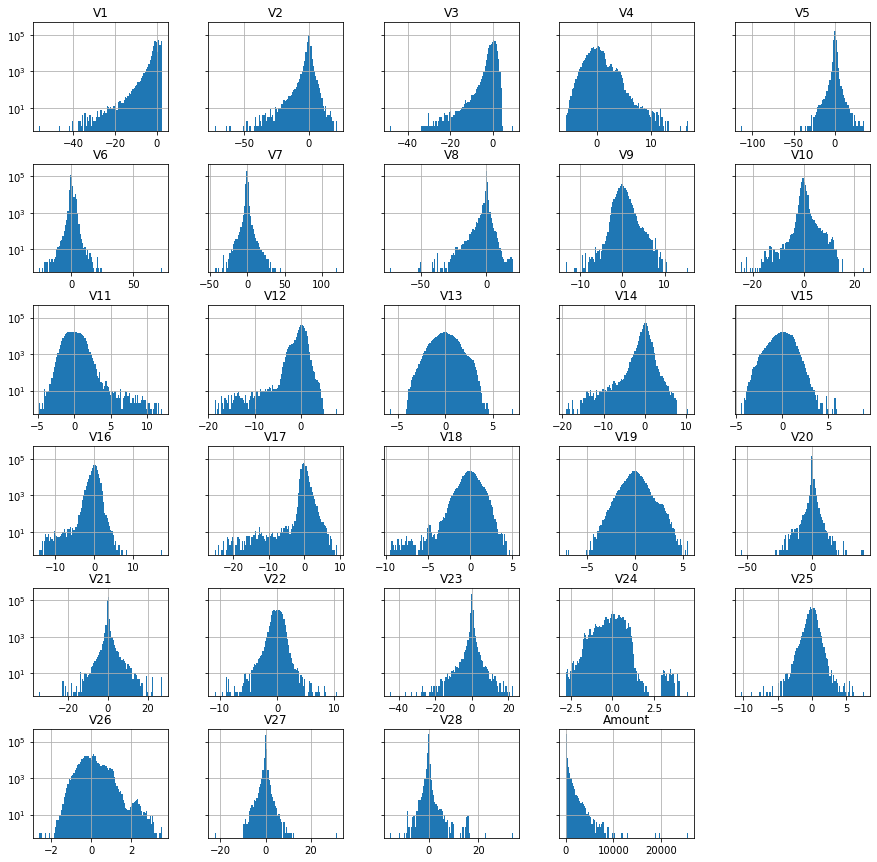

In [8]:
cc.hist(column=[f'V{i}' for i in range(1, 29)] + ['Amount'],
                log=True, bins=100, sharey=True, figsize=(15, 15), layout=(6, 5))
plt.show()

**Note on Normalization/Standardization**

The dataset information provided informs us that the features went through PCA transformation exept for Time (in seconds), amount, and class. Note that PCA transformation is impacted by scale so we need to scale the features in the data before applying PCA. This means that before the dataset was published with features PCA transformed, publishers must have scaled it. Normally data is scaled through standardization which in many cases is a requirement for optimal performance of many machine learning algorithms. Keeping with this line of reasoning we will neither standardize nor normalize. 

### Problem 2

Check the class balance and pick an evaluation metric.

In [9]:
f = 100 * (cc.loc[cc.Class==1].Class.count()/cc.shape[0])
nf = 100-f
print("Fraud Instances: {0:.2f}%\nNon-Fraud Instances: {1:.2f}%".format(f, nf))

Fraud Instances: 0.17%
Non-Fraud Instances: 99.83%


We notice here that vast majority of our data is non-fraud transactions. We have only have 0.17% of data marked as fraud. In total we have:

In [10]:
cc.loc[cc.Class==1].Class.count()

492

492 transactions out of 284,807. This is a very small number of instances as we saw above. Since our class is highly unbalanced we will use F1 score as a measure of performance. We also have to contend with the fact that we may get false alarms.

In [11]:
cc.drop(columns="Time", inplace=True)

### Problem 3

Split the dataset 50-50 for training and testing. Then run DecisionTreeClassifier, SVC, MLPClassifier without any tree pruning or regularization. Report your classification accuracy.

| Classifier             | Regularization Parameter | Default Value |
|------------------------|--------------------------|---------------|
| DecisionTreeClassifier | ccp_alpha                | 0.0           |
| SVC                    | C                        | 1.0           |
| MLPClassifier          | alpha                    | 0.0001        |

In [12]:
X = cc.loc[:, cc.columns != "Class"].values.astype(np.float32)
y = cc.loc[:, cc.columns == "Class"].values.astype(np.int32).ravel()

In [13]:
def splitter(X, y, test_size):
    return train_test_split(X, y, test_size=test_size, stratify=y, random_state=0)

In [14]:
X_train, X_test, y_train, y_test = splitter(X, y, 0.5)

In [15]:
def dtc(ccp_alpha=0):
    return DecisionTreeClassifier(ccp_alpha=ccp_alpha, class_weight="balanced", random_state=0)

def svc(C=1):
    return SVC(C=C, kernel="rbf", tol=0.05, class_weight="balanced", random_state=0)

def mlpc(alpha=0.0001):
    return MLPClassifier(alpha=alpha, hidden_layer_sizes=(10, 10), activation="relu", max_iter=300, random_state=0)

In [16]:
def run(X_train, X_test, y_train, y_test, ccp_alpha, C, alpha, info=False):
    clf_dtc = dtc(ccp_alpha=ccp_alpha).fit(X_train, y_train)
    y_pred = clf_dtc.predict(X_test)
    score_dtc = f1_score(y_test, y_pred)
    print("DecisionTreeClassier F1 Score: {0:.4f}%".format(score_dtc * 100)) if info else None
    
    clf_svc = svc(C=C).fit(X_train, y_train)
    y_pred = clf_svc.predict(X_test)
    score_svc = f1_score(y_test, y_pred)
    print("SVC F1 Score: {0:.4f}%".format(score_svc * 100)) if info else None
    
    clf_mlpc = mlpc(alpha=alpha).fit(X_train, y_train)
    y_pred = clf_mlpc.predict(X_test)
    score_mlpc = f1_score(y_test, y_pred)
    print("MLPClassifier F1 Score: {0:.4f}%".format(score_mlpc * 100)) if info else None
    
    return [score_dtc, score_svc, score_mlpc]

In [17]:
%%time 
acc1 = run(X_train, X_test, y_train, y_test, 0, 1, 0, info=True)

DecisionTreeClassier F1 Score: 74.0576%
SVC F1 Score: 20.8354%
MLPClassifier F1 Score: 81.4815%
CPU times: user 9min 56s, sys: 1.82 s, total: 9min 58s
Wall time: 9min 58s


### Problem 4

Run DecisionTreeClassifier, SVC, MLPClassifier with tree pruning and regularization (Hint: Use GridSearchCV to optimize the regularization parameters). Report your classification accuracy.

In [18]:
%%time

DTC_PARAMS = {'ccp_alpha':[0, 1e-5, 1e-4, 1e-3, 1e-2, 5e-2, 1e-1, 2e-1]}

clf_dt = GridSearchCV(dtc(), DTC_PARAMS, scoring="f1_micro", n_jobs=8)
clf_dt.fit(X_train, y_train)
clf_dt.best_estimator_

CPU times: user 4.58 s, sys: 186 ms, total: 4.77 s
Wall time: 23.8 s


DecisionTreeClassifier(ccp_alpha=0, class_weight='balanced', random_state=0)

In [19]:
%%time

SVC_PARAMS = {'C':[1e-2, 1e-1, 1, 10, 50, 100, 200, 500]}

clf_svc = GridSearchCV(svc(), SVC_PARAMS, scoring="f1_micro", n_jobs=8)
clf_svc.fit(X_train, y_train)
clf_svc.best_estimator_

/Users/paras/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CPU times: user 5min 2s, sys: 1.11 s, total: 5min 3s
Wall time: 49min 37s


SVC(C=10, class_weight='balanced', random_state=0, tol=0.05)

In [20]:
%%time

MLPC_PARAMS = {'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 5e-2, 1e-1, 2e-1]}

clf_mlpc = GridSearchCV(mlpc(), MLPC_PARAMS, scoring="f1_micro", n_jobs=8)
clf_mlpc.fit(X_train, y_train)
clf_mlpc.best_estimator_

CPU times: user 8.72 s, sys: 181 ms, total: 8.9 s
Wall time: 1min 48s


MLPClassifier(alpha=0.001, hidden_layer_sizes=(10, 10), max_iter=300,
              random_state=0)

In [21]:
%%time
acc2 = run(X_train, X_test, y_train, y_test, 0, 10, 0.001, info=True)

DecisionTreeClassier F1 Score: 74.0576%
SVC F1 Score: 22.1193%
MLPClassifier F1 Score: 80.0000%
CPU times: user 6min 45s, sys: 1.03 s, total: 6min 46s
Wall time: 6min 46s


### Problem 5

Attempt avoiding overfitting while the training is reduced. Add splits 40-60, 30-70, 20-80, 10-90, 5-95 and repeat step 3 and step 4.

In [22]:
def get_opt1_clf(X_train, y_train):
    clf_dtc = GridSearchCV(dtc(), DTC_PARAMS, scoring="f1_micro", n_jobs=8)
    clf_dtc.fit(X_train, y_train)
    clf_svc = GridSearchCV(svc(), SVC_PARAMS, scoring="f1_micro", n_jobs=8)
    clf_svc.fit(X_train, y_train)
    clf_mlpc = GridSearchCV(mlpc(), MLPC_PARAMS, scoring="f1_micro", n_jobs=8)
    clf_mlpc.fit(X_train, y_train)
    return clf_dtc, clf_svc, clf_mlpc

In [23]:
def experiment(X, y, test_size):
    X_train, X_test, y_train, y_test = splitter(X, y, test_size)
    acc1 = run(X_train, X_test, y_train, y_test, 0, 1, 0)
    clf_dtc, clf_svc, clf_mlpc = get_opt1_clf(X_train, y_train)
    f1_dtc = f1_score(y_test, clf_dtc.best_estimator_.predict(X_test))
    f1_svc = f1_score(y_test, clf_svc.best_estimator_.predict(X_test))
    f1_mlpc = f1_score(y_test, clf_mlpc.best_estimator_.predict(X_test))
    best_params = [clf_dtc.best_params_['ccp_alpha'], clf_svc.best_params_['C'], clf_mlpc.best_params_['alpha']]
    return acc1, [f1_dtc, f1_svc, f1_mlpc], best_params

In [24]:
%%time
acc1, acc2, params = experiment(X, y, 0.4)

/Users/paras/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CPU times: user 15min 36s, sys: 2.57 s, total: 15min 39s
Wall time: 1h 26min 14s


**Note:** Because it took an hour and a half for the cell to run, and this is mostly due to the SVC method. I have redefined get_opt1_clf and experiement functions without SVC. I have not found a better to make it run faster.

In [25]:
def get_opt1_clf(X_train, y_train):
    clf_dtc = GridSearchCV(dtc(), DTC_PARAMS, scoring="f1_micro", n_jobs=8)
    clf_dtc.fit(X_train, y_train)
    clf_mlpc = GridSearchCV(mlpc(), MLPC_PARAMS, scoring="f1_micro", n_jobs=8)
    clf_mlpc.fit(X_train, y_train)
    return clf_dtc, clf_mlpc

In [26]:
def run(X_train, X_test, y_train, y_test, ccp_alpha, alpha, info=False):
    clf_dtc = dtc(ccp_alpha=ccp_alpha).fit(X_train, y_train)
    y_pred = clf_dtc.predict(X_test)
    score_dtc = f1_score(y_test, y_pred)
    print("DecisionTreeClassier F1 Score: {0:.4f}%".format(score_dtc * 100)) if info else None
    
    clf_mlpc = mlpc(alpha=alpha).fit(X_train, y_train)
    y_pred = clf_mlpc.predict(X_test)
    score_mlpc = f1_score(y_test, y_pred)
    print("MLPClassifier F1 Score: {0:.4f}%".format(score_mlpc * 100)) if info else None
    
    return [score_dtc, score_mlpc]

In [27]:
def experiment(X, y, test_size):
    X_train, X_test, y_train, y_test = splitter(X, y, test_size)
    acc1 = run(X_train, X_test, y_train, y_test, 0, 0)
    clf_dtc, clf_mlpc = get_opt1_clf(X_train, y_train)
    f1_dtc = f1_score(y_test, clf_dtc.best_estimator_.predict(X_test))
    f1_mlpc = f1_score(y_test, clf_mlpc.best_estimator_.predict(X_test))
    best_params = [clf_dtc.best_params_['ccp_alpha'], clf_mlpc.best_params_['alpha']]
    return acc1, [f1_dtc, f1_mlpc], best_params

In [28]:
%%time
acc1, acc2, params = experiment(X, y, 0.4)

CPU times: user 41 s, sys: 410 ms, total: 41.4 s
Wall time: 2min 58s


In [29]:
%%time
TEST_SIZES = (0.5, 0.6, 0.7, 0.8, 0.9, 0.95)
Acc1, Acc2, Params = [acc1], [acc2], [params]
for ts in TEST_SIZES:
    acc1, acc2, params = experiment(X, y, ts)
    Acc1 += [acc1]
    Acc2 += [acc2]
    Params += [params]

CPU times: user 1min 52s, sys: 1.36 s, total: 1min 54s
Wall time: 7min 29s


In [30]:
Params

[[0, 0.05],
 [0, 0.001],
 [1e-05, 0.01],
 [1e-05, 0.05],
 [0, 0.05],
 [0.0001, 0.001],
 [0.0001, 1e-05]]

### Problem 6

Plot everything you have on a single plot and comment about your results in terms of training size, regularization, etc.

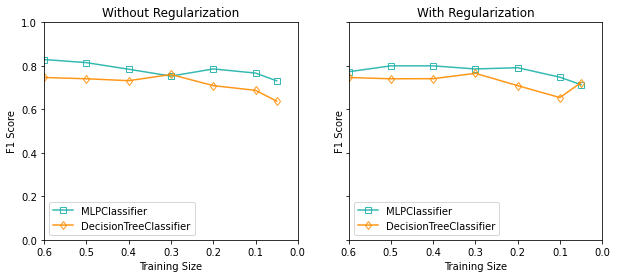

In [33]:
x = 1-np.array([0.4] + list(TEST_SIZES))

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axs[0].plot(x, [_[1] for _ in Acc1], c="lightseagreen", marker='s', mfc="None", alpha=0.9, label="MLPClassifier")
axs[0].plot(x, [_[0] for _ in Acc1], c="darkorange", marker='d', mfc="None", alpha=0.9, label="DecisionTreeClassifier")
axs[0].set_xlabel("Training Size")
axs[0].set_ylabel("F1 Score")
axs[0].set_xlim(x.max(), 0)
axs[0].set_ylim(0, 1)
axs[0].legend(loc="lower left")
axs[0].set_title("Without Regularization")

axs[1].plot(x, [_[1] for _ in Acc2], c="lightseagreen", marker='s', mfc="None", alpha=0.9, label="MLPClassifier")
axs[1].plot(x, [_[0] for _ in Acc2], c="darkorange", marker='d', mfc="None", alpha=0.9, label="DecisionTreeClassifier")
axs[1].set_xlabel("Training Size")
axs[1].set_ylabel("F1 Score")
axs[1].set_xlim(x.max(), 0)
axs[1].set_ylim(0, 1)
axs[1].legend(loc="lower left")
axs[1].set_title("With Regularization")

plt.show()

MLPClassifier falls when we keep 5% training and no regularization. Furthermore, we also notice that with this dataset the DecisionTreeClassifier is less prone to overfitting - entropy optimization perhaps helps. Biggest lesson from this excercise is that keeping testing dataset size small, training is difficult with just a few positive examples. As positive examples get smaller, we may experience overfitting the data. As the positive examples get smaller and smaller the model will experience difficulity knowing ground truth or the real-world. We also notice that regularlization helps reduce overfitting and eventually improves the performance on testing.